# KMeans

In [1]:
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()  # for plot styling
import numpy as np

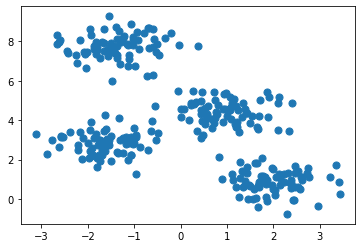

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

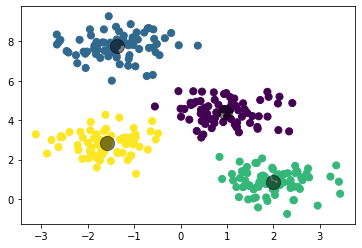

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Task: Implement K-means clustering without sklearn

In [13]:
def random_centroid(X,k):
    random_idx = [np.random.randint(len(X)) for i in range(k)]
    centroids = []
    for i in random_idx:
        centroids.append(X[i])
    return np.asarray(centroids)

In [14]:
cent = random_centroid(X,4)

In [20]:
def new_centroids(X,K,n_iter):
    m = X.shape[0]
    n = X.shape[1]
    for i in range(n_iter):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X-cent.T[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1

        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(2,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
        for k in range(K):
            Y[k+1]=Y[k+1].T
            cent.T[:,k]=np.mean(Y[k+1],axis=0)
        Output=Y
    return Output

In [22]:
Output = new_centroids(X,4,50)

In [23]:
def plot(K,Output):
    for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1])
    plt.scatter(cent.T[0,:],cent.T[1,:],s=300,c='black')
    plt.show()

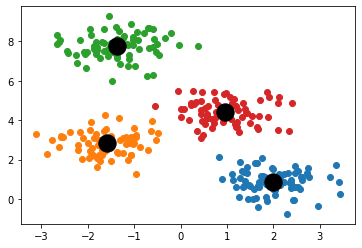

In [24]:
plot(4,Output)